**The CIFAR-10 dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 


In [24]:
import pandas as pd
import numpy as np
import csv
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import random as rnd 
import tensorflow as tf

from sklearn import datasets
from PIL import Image
import argparse

In [25]:

import os
import sys
import numpy as np
import _pickle  as pickle
from natsort import natsorted
from PIL import Image
from PIL import ImageOps

**Primera imagen del set de train en escala de grises**

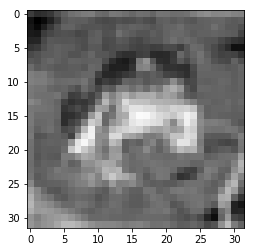

In [92]:
file ="/home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/train/1.png"
imgn= Image.open(file)
bn = imgn.convert('LA')
#plt.figure(figsize=(9,10))
plt.imshow(bn);

In [87]:
os.chdir('/home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/train')
sys.argv[1]='/home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/train'
sys.argv[2]='/home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/trainsal'
#sys.argv[3]=sys.argv[1]

In [88]:
names = [ d for d in os.listdir(sys.argv[1]) if d.endswith( '.png') ]
len(names)

50000

Una de las soluciones para este dataset es convertir las imagenes en archivos binarios, esto se hace con el proceso de abajo, donde juntamos bloques de 10mil en 10mil imagenes para tener asi 5 archivos binarios para entrenar y 10mil registos para testear.

In [89]:

def process( image ):
    image = np.array( image )           # 32 x 32 x 3
    image = np.rollaxis( image, 2 )     # 3 x 32 x 32
    image = image.reshape( -1 )         # 3072
    return image
 
def get_batch_path( output_dir, number ):
    filename = "data_batch_{}".format( number )
    return os.path.join( output_dir, filename )

def get_empty_batch():
    return np.zeros(( 3072, 0 ), dtype = np.uint8 )
 
def write_batch( path, batch ):
    print ("writing {}...\n".format( path ))
    labels = [ 0 for x in range( batch.shape[1] ) ]
    d = { 'labels': labels, 'data': batch }
    pickle.dump( d, open( path, "wb" ))

def main():
    input_dir = sys.argv[1]
    output_dir = sys.argv[2]

   
    
    try:
        batch_counter = int( 1 )
    except IndexError:
        batch_counter = 7

    batch_size = 10000

    print ("reading file names...")
    names = [ d for d in os.listdir( input_dir ) if d.endswith( '.png') ]
    names = natsorted( names )
 
    if batch_counter > 7:
        omit_batches = batch_counter - 7
        omit_images = omit_batches * batch_size
        names = names[omit_images:]
        print ("omiting {} images".format( omit_images ))

    current_batch = get_empty_batch()
    counter = 0
 
    for n in names:

        image = Image.open( os.path.join( input_dir, n ))
        try:
            image = process( image )
        except ValueError:
            print ("problem with image {}".format( n ))
            sys.exit( 1 )

        image = image.reshape( -1, 1 )
        current_batch = np.hstack(( current_batch, image ))

        if current_batch.shape[1] == batch_size:
            batch_path = get_batch_path( output_dir, batch_counter )
            write_batch( batch_path, current_batch )

            batch_counter += 1
            current_batch = get_empty_batch()

        counter += 1
        if counter % 1000 == 0:
            print (n)



if __name__ == '__main__':
	main()

reading file names...
1000.png
2000.png
3000.png
4000.png
5000.png
6000.png
7000.png
8000.png
9000.png
writing /home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/trainsal/data_batch_1...

10000.png
11000.png
12000.png
13000.png
14000.png
15000.png
16000.png
17000.png
18000.png
19000.png
writing /home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/trainsal/data_batch_2...

20000.png
21000.png
22000.png
23000.png
24000.png
25000.png
26000.png
27000.png
28000.png
29000.png
writing /home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/trainsal/data_batch_3...

30000.png
31000.png
32000.png
33000.png
34000.png
35000.png
36000.png
37000.png
38000.png
39000.png
writing /home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/trainsal/data_batch_4...

40000.png
41000.png
42000.png
43000.png
44000.png
45000.png
46000.png
47000.png
48000.png
49000.png
writing /home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/trainsal/data_batch_5...

50000.png


In [91]:
label = "dataset/test_dataset_csv/label.csv"
labelname = [os.path.join(os.getcwd(), label)]
labelname

['/home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/train/dataset/test_dataset_csv/label.csv']

In [4]:
from PIL import Image
import numpy as np

im = Image.open('/home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/train/1.png')
im = (np.array(im))

r = im[:,:,0].flatten()
g = im[:,:,1].flatten()
b = im[:,:,2].flatten()
label = [1]

out = np.array(list(label) + list(r) + list(g) + list(b),np.uint8)
out.tofile("/home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/train/out.bin")

In [166]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        cifar_dict = pickle.load(fo, encoding='bytes')
    return cifar_dict

In [167]:
dirs = ['batches.meta','data_batch_1','data_batch_2','data_batch_3','data_batch_4','data_batch_5','test_batch']

In [168]:
all_data = [0,1,2,3,4,5,6]
CIFAR_DIR='/home/abraham/ML-ITAM/ML-Abraham/clase-ML2017/trainsal/'

In [169]:
for i,direc in zip(all_data,dirs):
    all_data[i] = unpickle(CIFAR_DIR+direc)

In [170]:
batch_meta = all_data[0]
data_batch1 = all_data[1]
data_batch2 = all_data[2]
data_batch3 = all_data[3]
data_batch4 = all_data[4]
data_batch5 = all_data[5]
test_batch = all_data[6]

In [171]:
batch_meta
    

{b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_cases_per_batch': 10000,
 b'num_vis': 3072}

In [172]:
data_batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [191]:
data_batch1[b'labels']
batch_meta[b'label_names'][6]

b'frog'

In [182]:
X = data_batch1[b"data"] 
y=data_batch1[b'labels']

In [183]:
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [184]:

X[0].max()

255

In [185]:
(X[0]/255).max()

1.0

Mostramosalgunas imagnes a partir de 

b'frog'


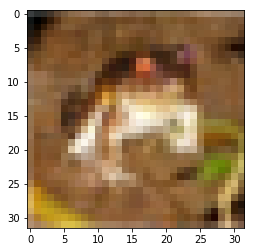

In [195]:
plt.imshow(X[0])
print(batch_meta[b'label_names'][y[0]])

b'truck'


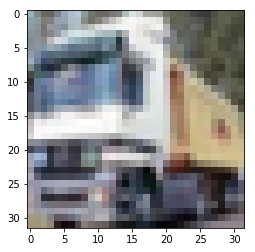

In [196]:
plt.imshow(X[1]) 
print(batch_meta[b'label_names'][y[1]])

b'dog'


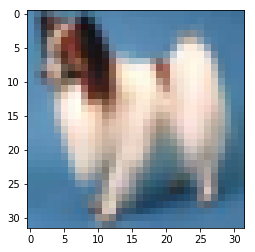

In [197]:
plt.imshow(X[4000]) 
print(batch_meta[b'label_names'][y[4000]])

In [154]:
def one_hot_encode(vec, vals=10):
    '''
    For use to one-hot encode the 10- possible labels
    '''
    n = len(vec)
    out = np.zeros((n, vals))
    out[range(n), vec] = 1
    return out

In [155]:
class CifarHelper():
    
    def __init__(self):
        self.i = 0
        
        self.all_train_batches = [data_batch1,data_batch2,data_batch3,data_batch4,data_batch5]
        self.test_batch = [test_batch]
        
        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
        self.test_labels = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        self.training_images = np.vstack([d[b"data"] for d in self.all_train_batches])
        train_len = len(self.training_images)
        
        self.training_images = self.training_images.reshape(train_len,3,32,32).transpose(0,2,3,1)/255
        self.training_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.all_train_batches]), 10)
        
        print("Setting Up Test Images and Labels")
        
        self.test_images = np.vstack([d[b"data"] for d in self.test_batch])
        test_len = len(self.test_images)
        
        self.test_images = self.test_images.reshape(test_len,3,32,32).transpose(0,2,3,1)/255
        self.test_labels = one_hot_encode(np.hstack([d[b"labels"] for d in self.test_batch]), 10)

        
    def next_batch(self, batch_size):
        x = self.training_images[self.i:self.i+batch_size].reshape(100,32,32,3)
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

In [156]:
ch = CifarHelper()
ch.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


**Con las imagenes ordenadas hacemos el CNN**

In [198]:
import tensorflow as tf

In [199]:
x = tf.placeholder(tf.float32,shape=[None,32,32,3])
y_true = tf.placeholder(tf.float32,shape=[None,10])

In [206]:
hold_prob = tf.placeholder(tf.float32)

In [219]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.softmax(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [220]:
convo_1 = convolutional_layer(x,shape=[4,4,3,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [221]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[4,4,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [222]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,8*8*64])

In [223]:
full_layer_one = tf.nn.softmax(normal_full_layer(convo_2_flat,1024))

In [224]:
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [225]:
y_pred = normal_full_layer(full_one_dropout,10)

In [226]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [227]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [228]:
init = tf.global_variables_initializer()

**Funcion de transferencia Relu**

In [217]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(5000):
        batch = ch.next_batch(100)
        sess.run(train, feed_dict={x: batch[0], y_true: batch[1], hold_prob: 0.5})
        
       
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:ch.test_images,y_true:ch.test_labels,hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is:
0.0987


Currently on step 100
Accuracy is:
0.3961


Currently on step 200
Accuracy is:
0.4835


Currently on step 300
Accuracy is:
0.5125


Currently on step 400
Accuracy is:
0.5285


Currently on step 500
Accuracy is:
0.5709


Currently on step 600
Accuracy is:
0.5901


Currently on step 700
Accuracy is:
0.5973


Currently on step 800
Accuracy is:
0.5897


Currently on step 900
Accuracy is:
0.6164


Currently on step 1000
Accuracy is:
0.6289


Currently on step 1100
Accuracy is:
0.6371


Currently on step 1200
Accuracy is:
0.6492


Currently on step 1300
Accuracy is:
0.6477


Currently on step 1400
Accuracy is:
0.658


Currently on step 1500
Accuracy is:
0.6633


Currently on step 1600
Accuracy is:
0.6581


Currently on step 1700
Accuracy is:
0.6683


Currently on step 1800
Accuracy is:
0.6704


Currently on step 1900
Accuracy is:
0.6688


Currently on step 2000
Accuracy is:
0.6792


Currently on step 2100
Accuracy is:
0.6867


Currently on step 2200


**Funcion de transferencia softmax**

In [229]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(5000):
        batch = ch.next_batch(100)
        sess.run(train, feed_dict={x: batch[0], y_true: batch[1], hold_prob: 0.5})
        
       
        if i%100 == 0:
            
            print('Currently on step {}'.format(i))
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:ch.test_images,y_true:ch.test_labels,hold_prob:1.0}))
            print('\n')

Currently on step 0
Accuracy is:
0.1


Currently on step 100
Accuracy is:
0.1042


Currently on step 200
Accuracy is:
0.2121


Currently on step 300
Accuracy is:
0.2536


Currently on step 400
Accuracy is:
0.2589


Currently on step 500
Accuracy is:
0.2626


Currently on step 600
Accuracy is:
0.2683


Currently on step 700
Accuracy is:
0.2739


Currently on step 800
Accuracy is:
0.2796


Currently on step 900
Accuracy is:
0.2857


Currently on step 1000
Accuracy is:
0.2947


Currently on step 1100
Accuracy is:
0.3085


Currently on step 1200
Accuracy is:
0.3292


Currently on step 1300
Accuracy is:
0.3419


Currently on step 1400
Accuracy is:
0.3562


Currently on step 1500
Accuracy is:
0.3534


Currently on step 1600
Accuracy is:
0.3672


Currently on step 1700
Accuracy is:
0.3643


Currently on step 1800
Accuracy is:
0.3751


Currently on step 1900
Accuracy is:
0.3816


Currently on step 2000
Accuracy is:
0.3858


Currently on step 2100
Accuracy is:
0.3896


Currently on step 2200
Ac

**Relu resulta ser mejor funcion de transferencia que softmax**

NameError: name 'y_true' is not defined